<a href="https://colab.research.google.com/github/thornwishstalon/glowing-waffle/blob/main/e6/Intro_To_Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Markov Chains

###### Adapted From http://firsttimeprogrammer.blogspot.com/

In [ ]:
# Necessary imports
import numpy as np
import random as rm

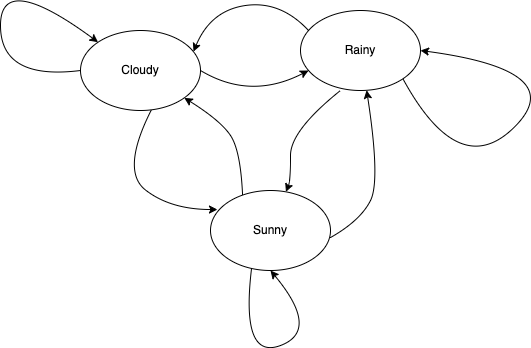



In [ ]:
# Let's define the statespace
states = ["Sunny","Cloudy", "Rainy"]

# Possible sequences of events
transitionName = [["SuSu","SuCl", "SuRa"],["ClSu","ClCl", "ClRa"],["RaSu","RaCl", "RaRa"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.6,0.2, 0.2],
                    [0.3,0.5,0.2],
                    [0.2,0.5,0.3]]

# Check that probabilities add to 1. If not, raise ValueError
if sum(transitionMatrix[0])!=1 or sum(transitionMatrix[1]) != 1 or sum(transitionMatrix[2]) != 1:
    print("Error!!!! Probabilities MUST ADD TO 1. Check transition matrix!!")
    raise ValueError("Probabilities MUST ADD TO 1")

In [ ]:
# A functions which implements the Markov model to forecast the weather
def weatherForecast(days, weatherToday = None):
    rm.seed()
    if weatherToday is None:
      weatherToday = 'Cloudy' if rm.random()<0.5 else 'Sunny'
    output = weatherToday
    i = 1
    print("Starting weather: ",weatherToday)
    while i < days:
        if weatherToday == "Sunny":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SuSu":
                pass
            elif change=="SuCl":
                weatherToday = "Cloudy"
            elif change=="SuRa":
                weatherToday = "Rainy"

        elif weatherToday == "Cloudy":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "ClCl":
                pass
            elif change == "ClSu":
                weatherToday = "Sunny"
            elif change == "ClRa":
                weatherToday = "Rainy"
                
        elif weatherToday == "Rainy":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "RaRa":
                pass
            elif change == "RaSu":
                weatherToday = "Sunny"         
            elif change == "RaCl":
                weatherToday = "Cloudy"         
        output+= ' ' + weatherToday
        i += 1
    return output

### Stationary probabilities given starting point


##### Random sequence

In [ ]:
# We forecast the weather for 100 days
forecast = weatherForecast(100, 'Sunny')
print(forecast)
pSunny = forecast.count('Sunny')/100
pCloudy = forecast.count('Cloudy')/100
pRainy = forecast.count('Rainy')/100
print([pSunny,pCloudy, pRainy])

Starting weather:  Sunny
Sunny Sunny Sunny Sunny Sunny Sunny Sunny Cloudy Cloudy Cloudy Cloudy Cloudy Cloudy Cloudy Sunny Sunny Sunny Sunny Sunny Cloudy Sunny Sunny Cloudy Sunny Sunny Sunny Sunny Rainy Sunny Sunny Sunny Rainy Cloudy Cloudy Rainy Cloudy Cloudy Cloudy Cloudy Sunny Sunny Sunny Cloudy Sunny Rainy Cloudy Cloudy Cloudy Cloudy Sunny Cloudy Sunny Cloudy Cloudy Sunny Rainy Sunny Cloudy Cloudy Cloudy Sunny Sunny Rainy Cloudy Cloudy Sunny Sunny Cloudy Sunny Rainy Cloudy Cloudy Sunny Sunny Sunny Sunny Cloudy Rainy Cloudy Sunny Sunny Rainy Cloudy Sunny Sunny Cloudy Sunny Sunny Sunny Rainy Cloudy Rainy Cloudy Rainy Cloudy Sunny Sunny Sunny Rainy Sunny
[0.49, 0.38, 0.13]


##### Simulated Run

In [ ]:
n=100000
forecast = weatherForecast(n, 'Cloudy')
p = []
for st in states:
  p.append(forecast.count(st)/n)
print(p)

Starting weather:  Cloudy
[0.4013, 0.37814, 0.22056]


##### Vector Multiplication

In [ ]:
# y = [1,0,0] # Sunny 
# y = [0,1,0] # Cloudy
y = [0,0,1] # Rainy
for i in range(0,100000):
  y=np.matmul(y,transitionMatrix)
print(y)



[0.3968254  0.38095238 0.22222222]
[[0.46 0.32 0.22]
 [0.37 0.41 0.22]
 [0.33 0.44 0.23]]


Given two weather prediction models represented by transition matrices A and B, which model is more
likely to produce Observation sequence O? Why?


A = $ \begin{bmatrix}
0.7 & 0.2 & 0.1 \\
0.2 & 0.5 & 0.3 \\
0.1 & 0.5 & 0.4 
\end{bmatrix}  $

B = $ \begin{bmatrix}
0.3 & 0.4 & 0.3 \\
0.5 & 0.2 & 0.3 \\
0.6 & 0.2 & 0.2 
\end{bmatrix}  $

O = $ \begin{bmatrix}
Rain & Cloudy&Sunny&Cloudy&Rain&Sunny&Cloudy&Rain&Sunny&Rain&Sunny&Rain&Cloudy&Rain&Cloudy&Rain&Sunny&Sunny&Rain&Sunny&Rain&Cloudy 
\end{bmatrix}  $



In [ ]:
A = {"SuSu":0.7,"SuCl":0.2, "SuRa":0.1,"ClSu":0.2,"ClCl":0.5, "ClRa":0.3,"RaSu":0.1,"RaCl":0.2, "RaRa":0.2 }
B = {"SuSu":0.3,"SuCl":0.4, "SuRa":0.3,"ClSu":0.5,"ClCl":0.2, "ClRa":0.3,"RaSu":0.6,"RaCl":0.2, "RaRa":0.2 }
O = ["Rain",	"Cloudy",	"Sunny",	"Cloudy",	"Rain",	"Sunny",	"Cloudy",	"Rain","Sunny","Rain","Sunny","Rain","Cloudy","Rain","Cloudy","Rain","Sunny","Sunny","Rain","Sunny","Rain","Cloudy"]

p_a = (0.1+0.3+0.4) # we have to start in the rain
p_b = (0.6+0.3+0.3) # we have to start in the rain
# starting with p_a, p_b = 1 

for i in range(len(O)-1):
  el_0 = O[i]
  el_1 = O[i+1]
  key = f"{el_0[0:2]}{el_1[0:2]}"
  p_a *= A[key]
  p_b *= B[key]

print(f"p(O|A)={p_a:.20f}")
print(f"p(O|B)={p_b:.20f}")


p(O|A)=0.00000000000000007258
p(O|B)=0.00000000019591041024


Arriving at state $O_n$ consists of a the probability of starting at state ***Rain*** times the linear combination of all the state transitions in the graph: 

$p(O|A)=0.00000000000000007258$

$p(O|B)=0.00000000019591041024$

Consequently it's more likely that B produces O.

# Theoretical example
Given a hypothetical situation of a company monitoring its electrical generators, with the goal of detecting when generators need maintenance based on the sounds they emit. Generators are being continuously monitored with microphones, with the audio data being stored for processing. 
Your goal is to help this company develop some sort of machine learning pipeline that would ingest this data and use it for training, in order to detect sounds that would indicate the need for maintenance. Answer these questions:

1. Would you consider this to be supervised or unsupervised learning, and why?
2. What architecture would you use for machine learning, and why?
3. What stages of preprocessing would your pipeline involve, and why?


## ad 1.
I would see this as a supervised learning task, since we want to recognize a certain states of the generators, which need to be defined through lables. 
This could otherwise be expressed as an anomaly detection system, which in turn could be done in an unsupervised manner to identify outliers (i.e. unusual noises)

## ad 2. 
For this example, I think it would be easier to rely on an unsupervised approach, since it could hard to get training data for all states that we want to recognize. Identifying outliers from the "normal" operation noises seems sound. This could be expressed as cluster-outlier problem in a multidimensional feature space.

## ad 3. 
the Preproccessing Pipeline could look like this:
* capture 500ms of audio signals
* Downsampling to 8000hz
* normalize input signal
* create a sliding window of overlapping frames
* for each frame extract usable features:
  * Spectral Centroid
  * Spectral Spread
  * Spectral Flux
  * MFCC
  * Zero Crossing Rate
  * ... and more

Training k-means would yield k-centroids of all our training samples.
To identify outliers, we could simply test where a sample fould fit in our clustered training set and could hopefully then determine if the noise perceived is an "expensive" one.



